Internet use and religion in Europe, part four
-----------------------------------------

This notebook presents explorations of the association between Internet use and religion in Europe, using data from the European Social Survey (http://www.europeansocialsurvey.org).

Copyright 2015 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

import string
import random

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

import ess

%matplotlib inline

I run the resampling process a few hundred times and store the results in HDF

In [2]:
store = pd.HDFStore('ess.resamples.h5')

It's pretty fast, considering the size of these DataFrames.


Make the country objects

In [49]:
reload(ess)
keys = store.keys()
key = random.choice(keys)
df = store.get(key)

grouped = df.groupby('cntry')
country_map = {}

for code, group in grouped:
    country_map[code] = ess.Country(code, len(group))
    print(country_map[code].name)

Austria
Belgium
Bulgaria
Switzerland
Cyprus
Czech Republic
Germany
Denmark
Estonia
Spain
Finland
France
United Kingdom
Greece
Croatia
Hungary
Ireland
Israel
Iceland
Italy
Lithuania
Luxembourg
Latvia
Netherlands
Norway
Poland
Portugal
Romania
Russia
Sweden
Slovenia
Slovakia
Turkey
Ukraine


For each resampled frame, run both models and store the results in the Country objects

In [50]:
formula1 = ('hasrelig_f ~ inwyr07_f + yrbrn60_f + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

formula2 = ('rlgdgr_f ~ inwyr07_f + yrbrn60_f + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

def process_frame(df):
    grouped = df.groupby('cntry')
    for code, group in grouped:
        country = country_map[code]
        country.add_mean(group.mean())
    
        model = smf.logit(formula1, data=group)    
        results = model.fit(disp=False)
        country.add_params(results.params)
        add_ranges(country, group, results)
        
        model = smf.ols(formula2, data=group)    
        results = model.fit(disp=False)
        country.add_params2(results.params)

Process the dataframes in the store

In [51]:
for key in store.keys():
    print(key)
    df = store.get(key)
    df['hincrank_f2'] = df.hincrank_f ** 2
    df['edurank_f2'] = df.edurank_f ** 2
    process_frame(df)

/AObmFL
/ArWoDk
/CknqGo
/CzBGXK
/Dsmanr
/DwqVPH
/EehUgR
/FIuUao
/FrBQUu
/IAiBsd
/Igmauw
/IyzURW
/JGIBIt
/JKmiDx
/KHIAiE
/KgJfhy
/LNPDOS
/MBKVRg
/MFujPu
/MGThjk
/MQOWiT
/MZtIXp
/MerWdI
/Mzahxg
/NCDklz
/NSDQzJ
/NlxEdq
/ODmQsZ
/OUltTi
/PchHQV
/PkIiwv
/PxkKMq
/QcNiAG
/RDphnL
/RGCrqZ
/SseDPc
/TipelX
/VkWktF
/VmBOIf
/WIoraf
/WuvpPP
/XRhURP
/XZimFe
/Xcpmrf
/XnlzJK
/aWXoQd
/aaURyN
/bONekF
/cMgtHh
/cqfgNn
/csvFJT
/dAPpIp
/dUowuy
/eAXtAA
/eUdTJy
/egkwJD
/ekYwrd
/eyuHKh
/fBcnaL
/fTlnfl
/fyixZU
/gtKKPr
/hCRlbt
/jDvpKj
/lmDwFP
/lwQAhk
/lweNSO
/mlCkmp
/mrAYce
/mtvEvc
/nNXNSH
/nifUty
/oFbEpy
/oGCncp
/ohZwsM
/pmNrsg
/qdxRyR
/qonIjC
/qpSJCC
/rGtchB
/rUhjHV
/sZAwND
/sskpVw
/tJFyNx
/tjgzPT
/tmsGMC
/uHnSAQ
/uYskNJ
/ulNipO
/utxkHN
/vFwYvN
/vTeZZv
/wVzIyN
/xTLOEV
/yeqVLM
/ysywbd
/ywytWo
/zUTQdM
/zUkWBS
/zWyLEO
/zlVyPq


In [52]:
country = country_map['SE']
country.get_ranges('netuse_f')

array([[ 3.        ,  7.        ,  0.32621162,  0.3034635 ,  0.27885185,
        -0.04735977],
       [ 3.        ,  7.        ,  0.32991009,  0.30712761,  0.28198417,
        -0.04792592],
       [ 3.        ,  7.        ,  0.3137264 ,  0.30644272,  0.29853688,
        -0.01518951],
       [ 3.        ,  7.        ,  0.32581827,  0.31056392,  0.29462711,
        -0.03119115],
       [ 3.        ,  7.        ,  0.31422751,  0.30458986,  0.29373133,
        -0.02049619],
       [ 3.        ,  7.        ,  0.31755884,  0.30057188,  0.28160673,
        -0.03595211],
       [ 3.        ,  7.        ,  0.31565319,  0.30290493,  0.28938426,
        -0.02626893],
       [ 3.        ,  7.        ,  0.31819913,  0.30452474,  0.28934231,
        -0.02885682],
       [ 3.        ,  7.        ,  0.32637359,  0.30698559,  0.2857843 ,
        -0.0405893 ],
       [ 3.        ,  7.        ,  0.30875997,  0.30199771,  0.29466067,
        -0.0140993 ],
       [ 3.        ,  7.        ,  0.30363395,  0.

In [6]:
plot_counter = 1

def save_plot(flag=False):
    global plot_counter
    if flag:
        root = 'ess3.%2.2d' % plot_counter
        thinkplot.Save(root=root, formats=['png'])
        plot_counter += 1

Make a plot showing confidence interval for the given parameters

/home/downey/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


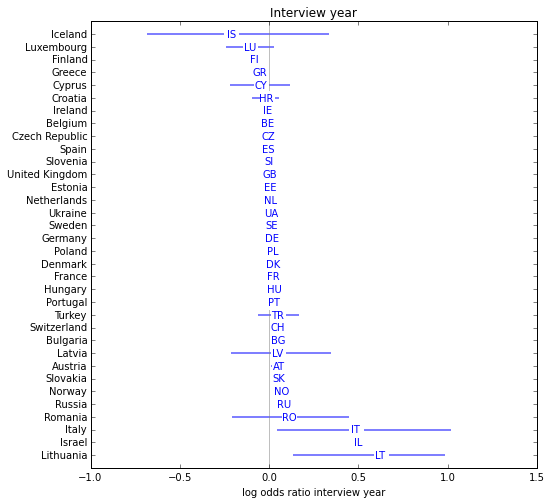

In [7]:
t = ess.extract_vars(country_map, 'inwyr07_f', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Interview year',
                 xlabel='log odds ratio interview year')
save_plot()

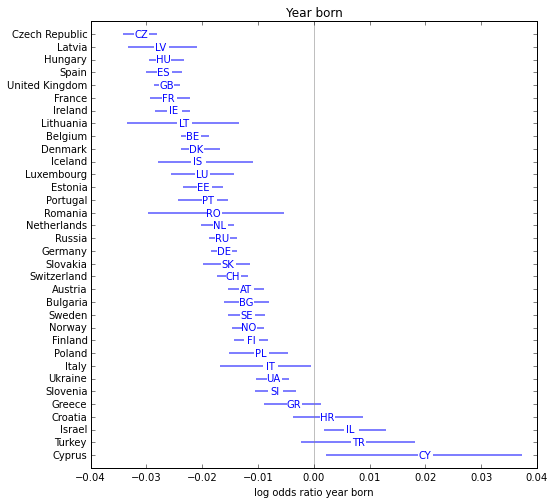

In [8]:
t = ess.extract_vars(country_map, 'yrbrn60_f', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Year born',
                 xlabel='log odds ratio year born')
save_plot()

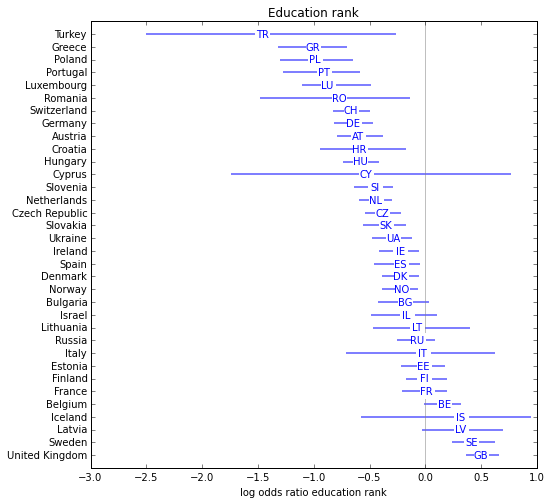

In [9]:
t = ess.extract_vars(country_map, 'edurank_f', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Education rank',
                 xlabel='log odds ratio education rank')
save_plot()

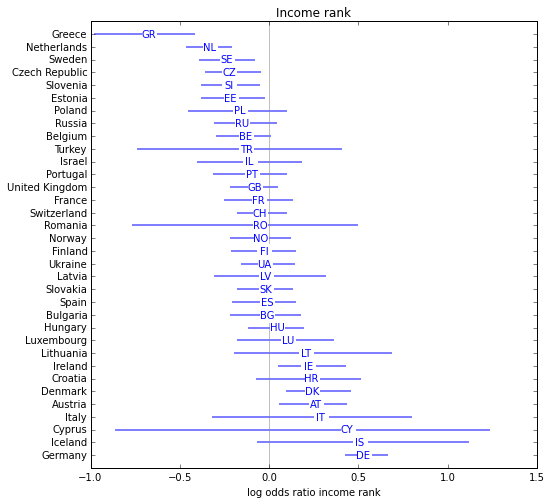

In [10]:
t = ess.extract_vars(country_map, 'hincrank_f', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Income rank',
                 xlabel='log odds ratio income rank')
save_plot()

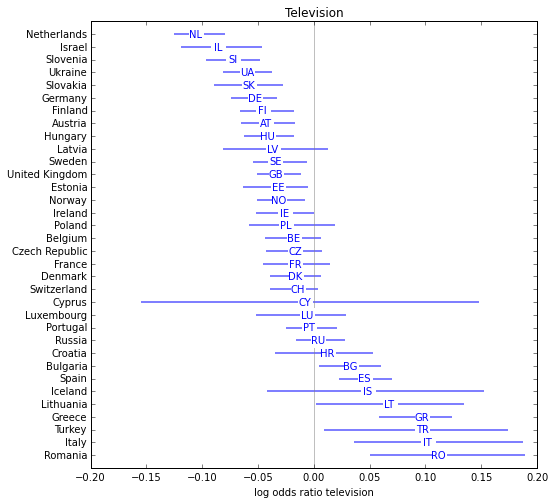

In [11]:
t = ess.extract_vars(country_map, 'tvtot_f', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Television',
                 xlabel='log odds ratio television')
save_plot()

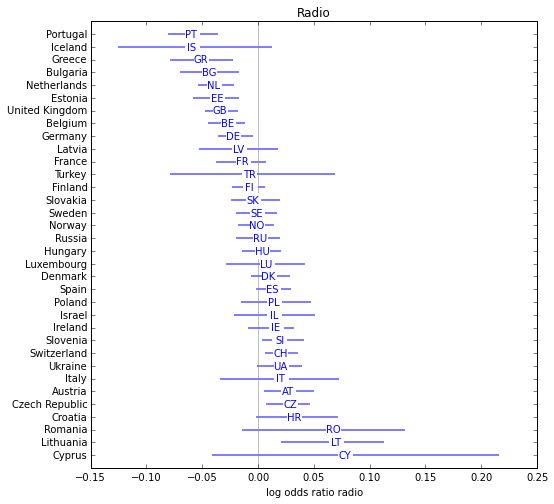

In [12]:
t = ess.extract_vars(country_map, 'rdtot_f', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Radio',
                 xlabel='log odds ratio radio')
save_plot()

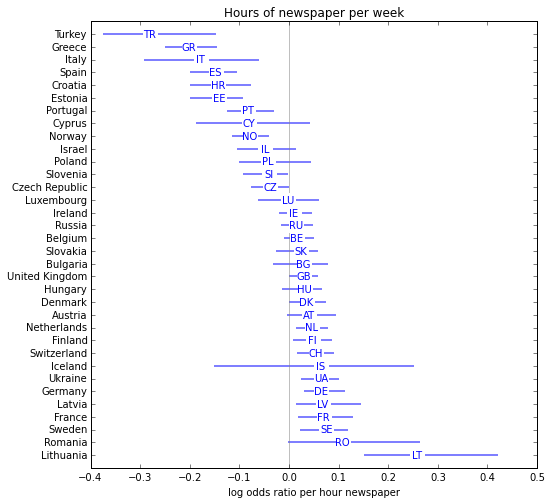

In [13]:
t = ess.extract_vars(country_map, 'nwsptot_f', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Hours of newspaper per week',
                 xlabel='log odds ratio per hour newspaper')
save_plot()

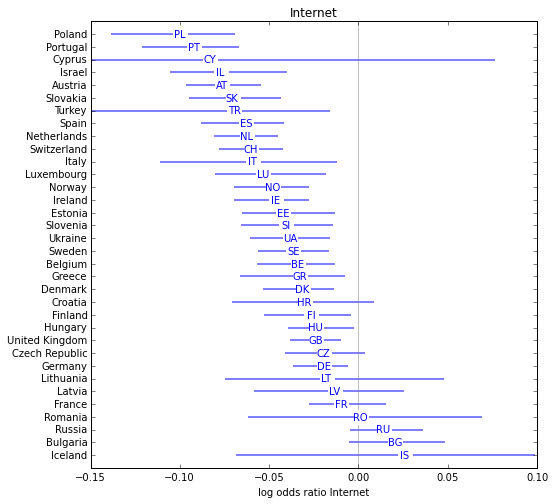

In [14]:
t = ess.extract_vars(country_map, 'netuse_f', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Internet',
                 xlabel='log odds ratio Internet', 
                 xlim=[-0.15, 0.1])
save_plot()

Make a scatter plot of fraction who have religion versus odds ratio of netuse.

-0.396065780771


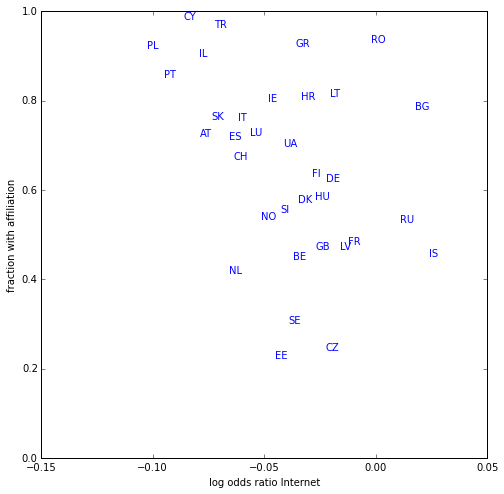

In [15]:
t = ess.extract_vars(country_map, 'netuse_f', 'hasrelig_f')
ess.plot_scatter(t)
thinkplot.Config(title='',
                 xlabel='log odds ratio Internet',
                 ylabel='fraction with affiliation',
                 xlim=[-0.15, 0.05])
save_plot()

Make similar figures for the second model, with degree of religiosity as the dependent variable.

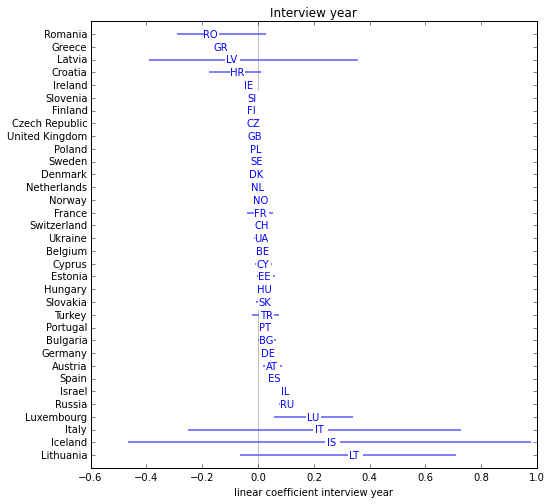

In [16]:
t = ess.extract_vars2(country_map, 'inwyr07_f', 'rlgdgr_f')
ess.plot_cis(t)
thinkplot.Config(title='Interview year',
                 xlabel='linear coefficient interview year')
save_plot()

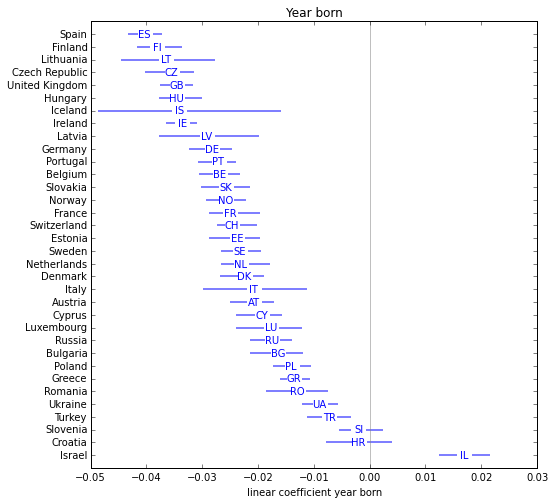

In [17]:
t = ess.extract_vars2(country_map, 'yrbrn60_f', 'rlgdgr_f')
ess.plot_cis(t)
thinkplot.Config(title='Year born',
                 xlabel='linear coefficient year born')
save_plot()

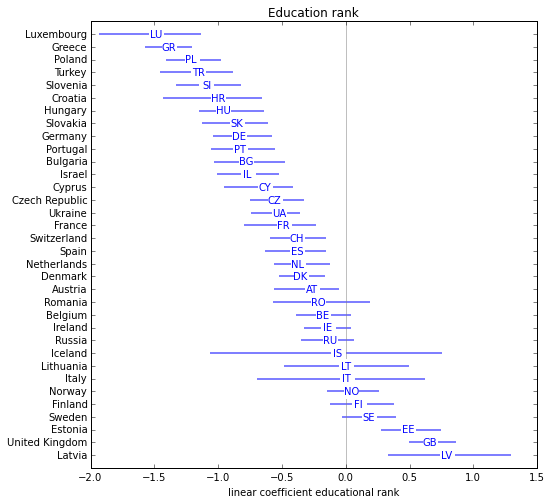

In [18]:
t = ess.extract_vars2(country_map, 'edurank_f', 'rlgdgr_f')
ess.plot_cis(t)
thinkplot.Config(title='Education rank',
                 xlabel='linear coefficient educational rank')
save_plot()

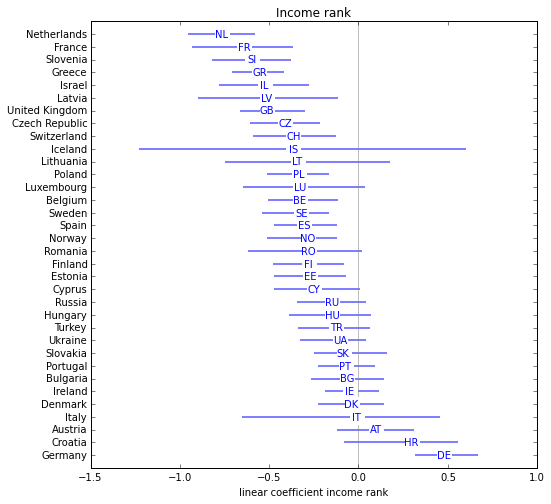

In [19]:
t = ess.extract_vars2(country_map, 'hincrank_f', 'rlgdgr_f')
ess.plot_cis(t)
thinkplot.Config(title='Income rank',
                 xlabel='linear coefficient income rank')
save_plot()

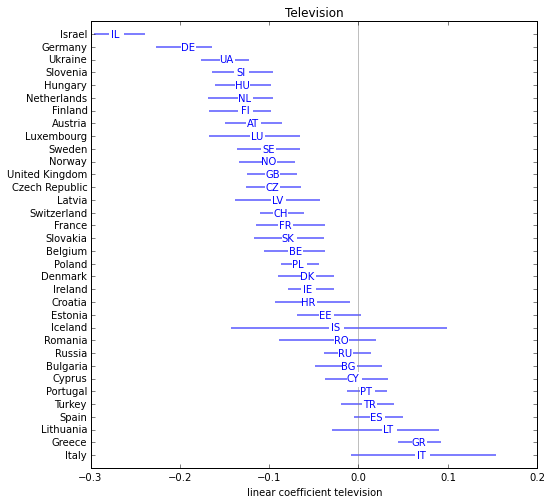

In [20]:
t = ess.extract_vars2(country_map, 'tvtot_f', 'rlgdgr_f')
ess.plot_cis(t)
thinkplot.Config(title='Television',
                 xlabel='linear coefficient television')
save_plot()

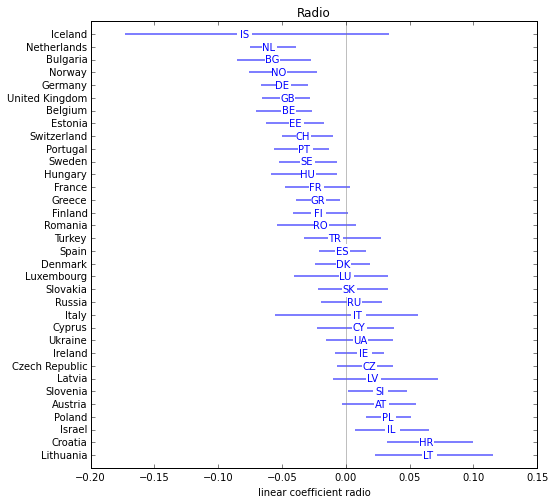

In [21]:
t = ess.extract_vars2(country_map, 'rdtot_f', 'rlgdgr_f')
ess.plot_cis(t)
thinkplot.Config(title='Radio',
                 xlabel='linear coefficient radio')
save_plot()

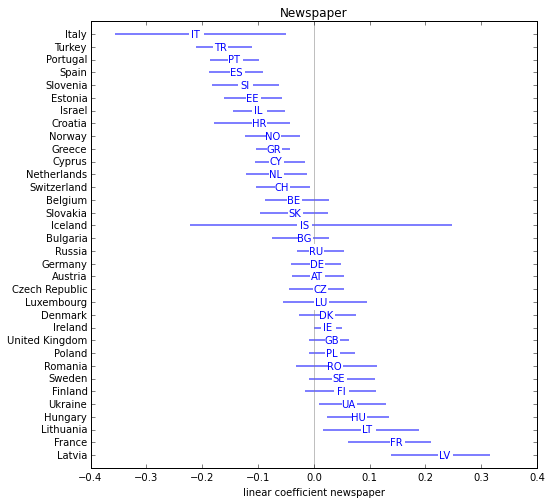

In [22]:
t = ess.extract_vars2(country_map, 'nwsptot_f', 'rlgdgr_f')
ess.plot_cis(t)
thinkplot.Config(title='Newspaper',
                 xlabel='linear coefficient newspaper')
save_plot()

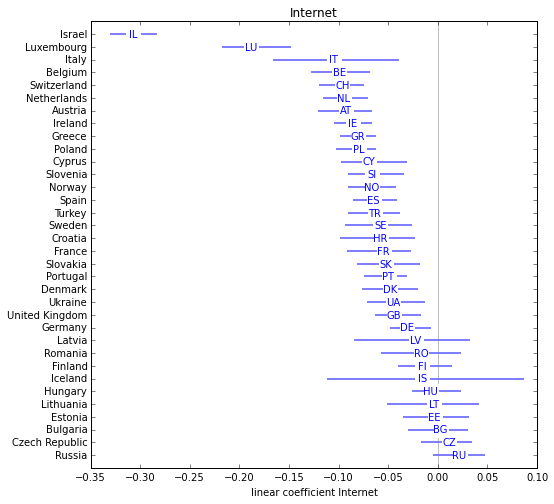

In [23]:
t = ess.extract_vars2(country_map, 'netuse_f', 'rlgdgr_f')
ess.plot_cis(t)
thinkplot.Config(title='Internet',
                 xlabel='linear coefficient Internet')
save_plot()

Here's the scatter plot of effect size on rlgdgr versus mean value of rlgdgr

rlgdgr is on a 0 to 10 scale, so it is mildly astonishing that national means vary as much as they do, from 2.5 to 7. 

-0.167858244302


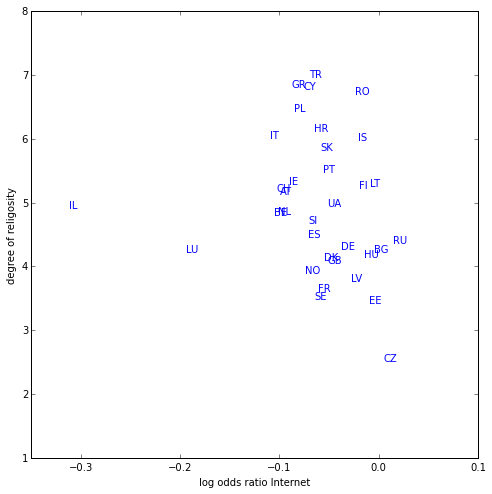

In [24]:
t = ess.extract_vars2(country_map, 'netuse_f', 'rlgdgr_f')
ess.plot_scatter(t)
thinkplot.Config(title='',
                 xlabel='log odds ratio Internet',
                 ylabel='degree of religosity',
                 xlim=[-0.35, 0.1], ylim=[1, 8])
save_plot()

The correlation is dragged down by the outliers; without them, it is more like we saw above.

In [25]:
codes, names, params, lows, highs, means = zip(*t[2:])
corr = np.corrcoef(params, means)[0][1]
print(corr)

-0.382987838992


The following is preliminary work on the next step, showing effect sizes in terms of probability of religious affiliation.

In [26]:
df.head()

,cntry,inwyr,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,...,yrbrn60_f,edurank_f,hincrank_f,tvtot_f,rdtot_f,nwsptot_f,netuse_f,inwyr07_f,hincrank_f2,edurank_f2
0,BE,2002,4,2,0,NaN,0,NaN,0,1,...,-23,0.142627,0.367677,4,0,0,0,-4.513441,0.135186,0.020343
1,BE,2002,7,1,4,1,0,NaN,0,1,...,-25,0.137802,0.278788,7,4,0,0,-5.267938,0.077723,0.018989
2,BE,2002,4,3,1,0,0,NaN,0,1,...,-35,0.454692,0.208081,4,1,0,0,-4.600677,0.043298,0.206745
3,BE,2002,7,3,7,4,4,2,1,1,...,-30,0.182842,0.256566,7,7,4,1,-4.634111,0.065826,0.033431
4,BE,2002,6,4,7,7,0,NaN,2,1,...,10,0.700268,0.467340,6,7,0,2,-5.063176,0.218407,0.490375


In [27]:
grouped = df.groupby('cntry')
group = grouped.get_group('NL')
country = country_map['NL']

In [28]:
formula1 = ('hasrelig_f ~ inwyr07_f + yrbrn60_f + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

model = smf.logit(formula1, data=group)    
results = model.fit(disp=False)

In [46]:
from collections import namedtuple
Range = namedtuple('Range', ['low_var', 'high_var', 'low', 'middle', 'high', 'width'])

In [47]:
def compute_range(country, group, results, varname):
    def predict(results, df):
        return results.predict(df)[0]

    low_var = np.percentile(group[varname], 25)
    high_var = np.percentile(group[varname], 75)
    
    df = group.mean()
    middle = predict(results, df)

    df[varname] = low_var
    low = predict(results, df)
    
    df[varname] = high_var    
    high = predict(results, df)
    
    return Range(low_var, high_var, low, middle, high, high-low)

In [48]:
def add_ranges(country, group, results):
    ranges = {}
    for varname in ['netuse_f', 'tvtot_f', 'rdtot_f', 'nwsptot_f']:
        ranges[varname] = compute_range(country, group, results, varname)
    
    country.add_ranges(ranges)

In [63]:
def extract_ranges(country_map, exp_var, dep_var):
    def param_func(country):
        ranges = country.get_ranges(exp_var)
        widths = [r[5] for r in ranges]
        return widths
    
    t = ess.extract_params(country_map, param_func, dep_var)
    return t

In [64]:
country.get_ranges('netuse_f')[0]

array([ 3.        ,  7.        ,  0.32621162,  0.3034635 ,  0.27885185,
       -0.04735977])

In [70]:
t = extract_ranges(country_map, 'netuse_f', 'hasrelig_f')

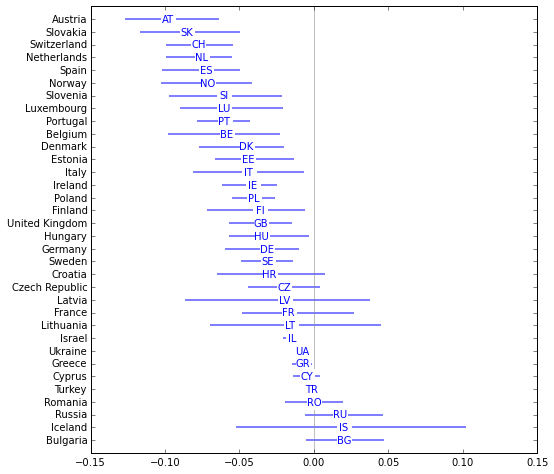

In [71]:
ess.plot_cis(t)